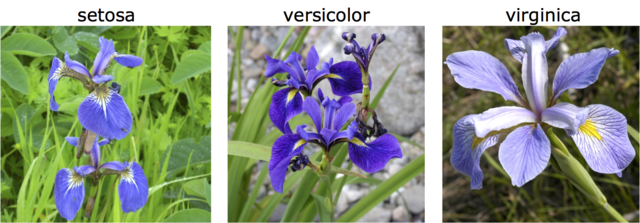

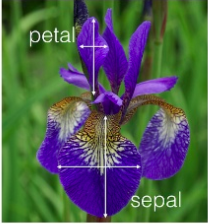

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     Species
0          0
1          0
2

In [41]:
"""
【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。
sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation
データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。
pandas.DataFrame — pandas 0.24.2 documentation"""


import numpy as np
import matplotlib.pyplot as plt
import pandas as pld
from PIL import Image
import IPython.display as display

#画像で表示
display.display(Image.open('series.png'))
display.display(Image.open('petal_sepal.png'))

#irisデータセットを読み込み
from sklearn.datasets import load_iris
iris_dataset = load_iris()

#説明変数(feature_names)をXに格納
X = pld.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
print(X)

#目的変数(target)をyに格納
y = pld.DataFrame(iris_dataset.target, columns=["Species"])
print(y)


In [2]:
"""
【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。
結合することで扱いやすくなります。これ以降はこのdfを使っていきます。"""

df = X.join(y)


In [3]:
"""【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。
・先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
・ラベルごとのサンプル数の合計を出力する。
・特徴量に欠損値があるかを確認する。
・特徴量の平均値と標準偏差、四分位数を一度に表示させる。"""

#先頭から4番目までのサンプルを表示。
print(df[0:5])
print("")

#.head()を使って先頭から5つの要素を抜き出す。
print(df.head())
print("")

#.info()メソッドで、行数・列数や全体のメモリ使用量、各列のデータ型や欠損値ではない要素の数などの情報を表示。
print(df.info())
print("")

#.describe()で、各列ごとに平均や標準偏差、最大値、最小値、最頻値などの要約統計量を取得。
print(df.describe())
print("")

#.insull()で、データがない箇所を表示。
print(df.isnull())
print("")

#.sum()で、合計を表示。
print(df.sum())
print("")

#.value_counts()で個数と比率を確認
print(df['Species'].value_counts())
print(df['Species'].value_counts(normalize=True))
print("")
print(df['sepal length (cm)'].value_counts(bins=5))
print(df['sepal length (cm)'].value_counts(bins=5, normalize=True))
print("")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6             

In [4]:
"""
【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、
データセット自体についてもう少し調査しておきましょう。
データセットを見る上で、そのデータセット自体について知っておくことも大切です。"""

print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
"""【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。
- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する
.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。"""

# sepal_widthの列を３つの異なる方法で抽出する
# Seriesとして出力
print(df['sepal width (cm)'])
print("")

# Dataframeとして出力
print(df[['sepal width (cm)']])
print("")

# .locを使って出力　Seriesとして
print(df.loc[:,'sepal width (cm)'])
print("")

# .locを使って出力　Dateframeとして
print(df.loc[:,['sepal width (cm)']])
print("")

# .ilocを使って出力　Seriesとして
print(df.iloc[:,1])
print("")

# .ilocを使って出力　Dataframeとして
print(df.iloc[:,[1]])
print("")

#.locは各行または各列の項目名で抽出する。一方、.ilocは番号で抽出する。


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

     sepal width (cm)
0                 3.5
1                 3.0
2                 3.2
3                 3.1
4                 3.6
..                ...
145               3.0
146               2.5
147               3.0
148               3.4
149               3.0

[150 rows x 1 columns]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

     sepal width (cm)
0                 3.5
1                 3.0
2                 3.2
3                 3.1
4                 3.6
..                ...
145               3.0
146               2.5
147               3.0
148               3.4
149               3.0

[150 rows x 1 columns]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3

In [6]:
# 50番目から99番目までのデータを抽出する

df.iloc[50:100,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [7]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df.loc[50:100,['petal length (cm)']]


,petal length (cm)
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [8]:
# petal_widthの値が0.2のデータを抽出する
df[df['petal width (cm)']==0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


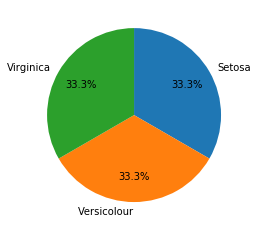

In [9]:
"""【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。
 - ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
 - 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
 - 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。"""

#ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
import matplotlib.pyplot as plt
label = ['Setosa', 'Versicolour', 'Virginica'] 
plt.pie(df['Species'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()


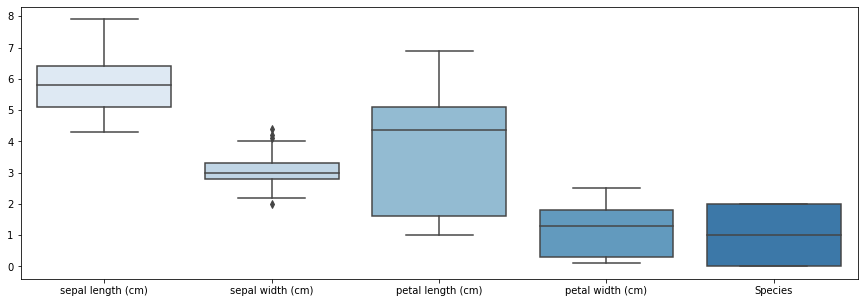

In [10]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.set_palette('Blues')
sns.boxplot(data=df)
plt.show()

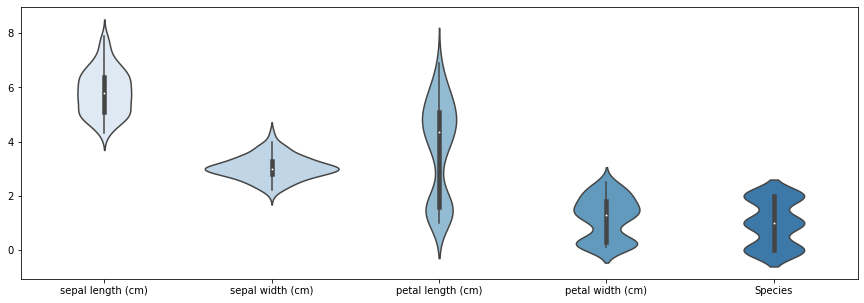

In [11]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
plt.figure(figsize=(15, 5))
sns.set_palette('Blues')
sns.violinplot(data=df)
plt.show()

#箱ひげ図とバイオリン図の違い
#箱ひげ図は、最小値・最大値・中央値・第１四分位・第２四分位といった位置やどの層のボリュームが多いかといった分布を確認できる。
#バイオリン図は、データがどの位置に集中しているかという分布の情報が分かる。


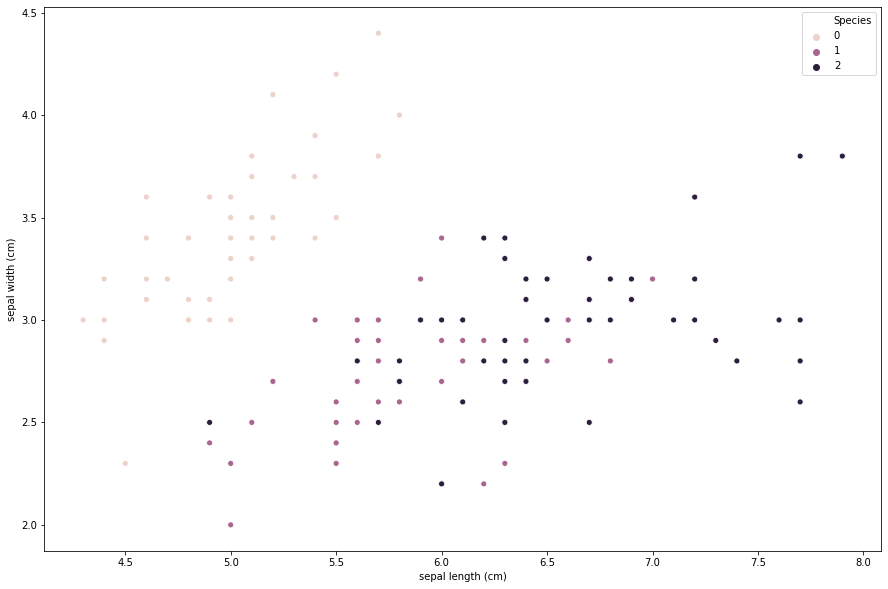

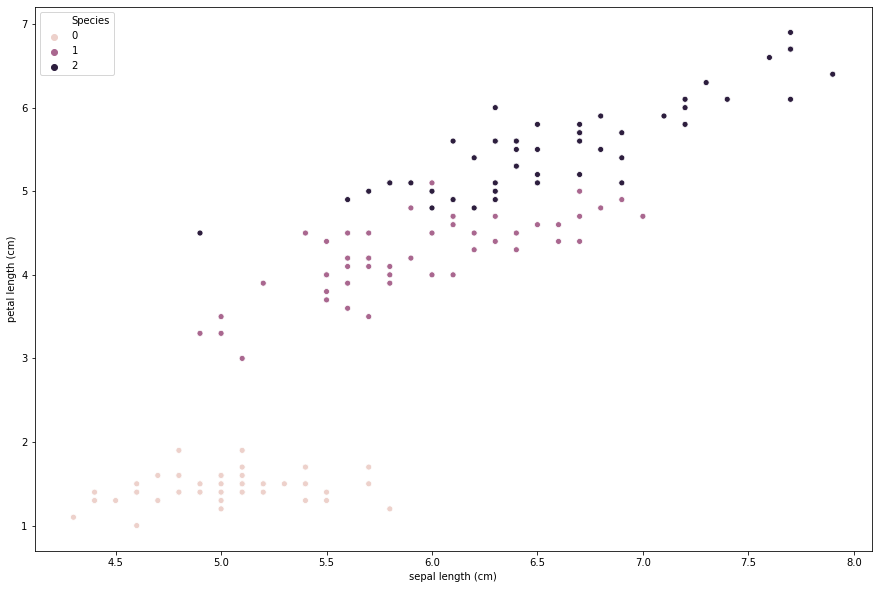

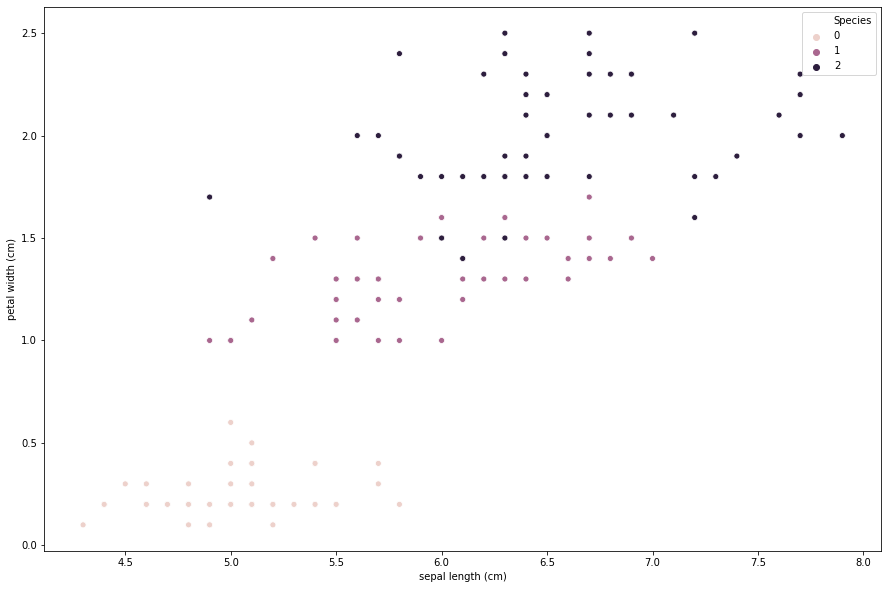

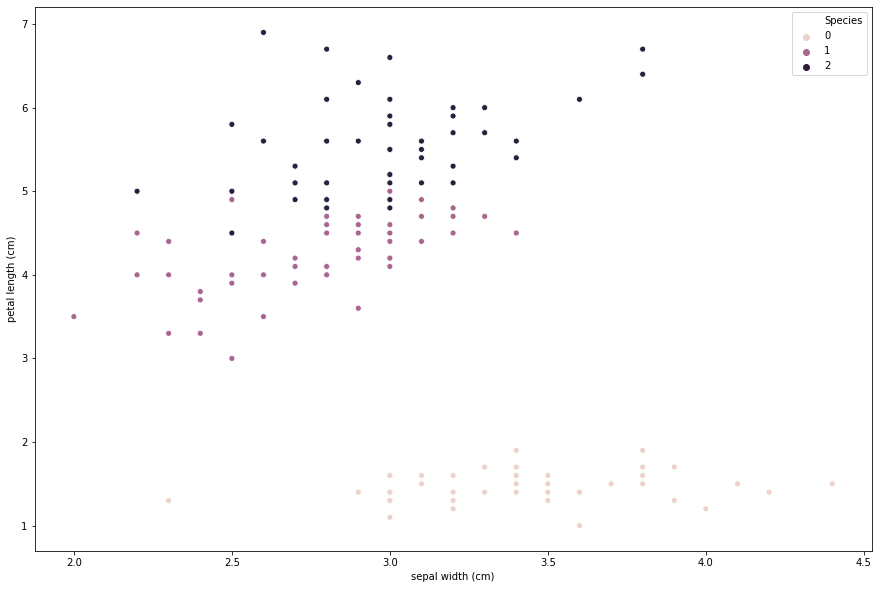

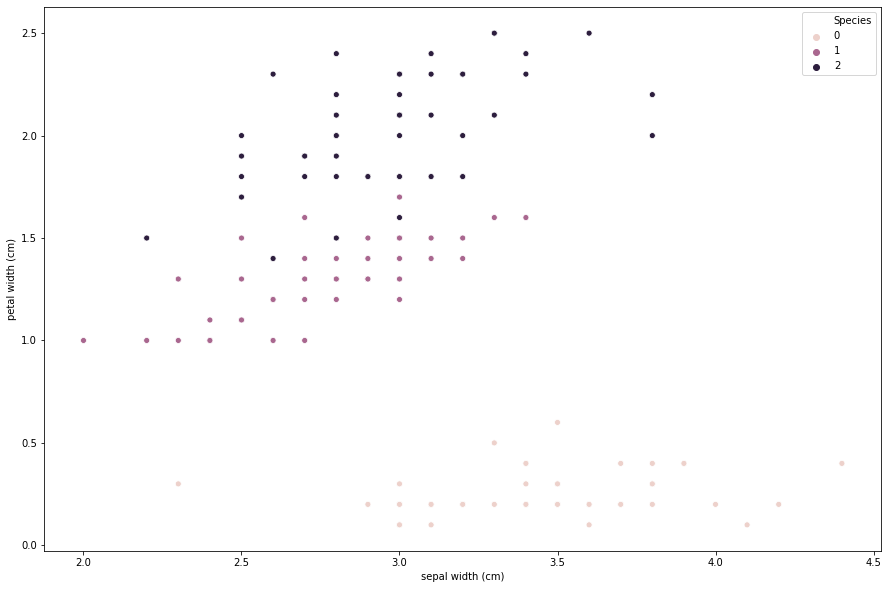

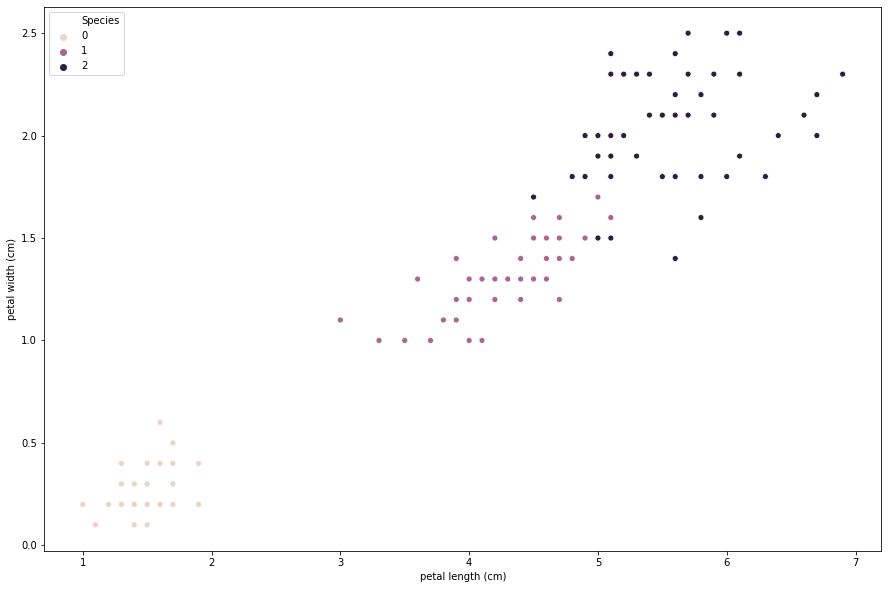

In [15]:
"""【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。"""

#４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。

# x='sepal length (cm)', y='sepal width (cm)'
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue="Species", )
plt.show()

# x='sepal length (cm)', y='petal length (cm)'
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue="Species", )
plt.show()

# x='sepal length (cm)', y='petal width (cm)'
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal width (cm)', hue="Species", )
plt.show()

# x='sepal width (cm)', y='petal length (cm)'
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='sepal width (cm)', y='petal length (cm)', hue="Species", )
plt.show()

# x='sepal width (cm)', y='petal width (cm)'
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='sepal width (cm)', y='petal width (cm)', hue="Species", )
plt.show()

# x='petal length (cm)', y='petal width (cm)'
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue="Species", )
plt.show() 

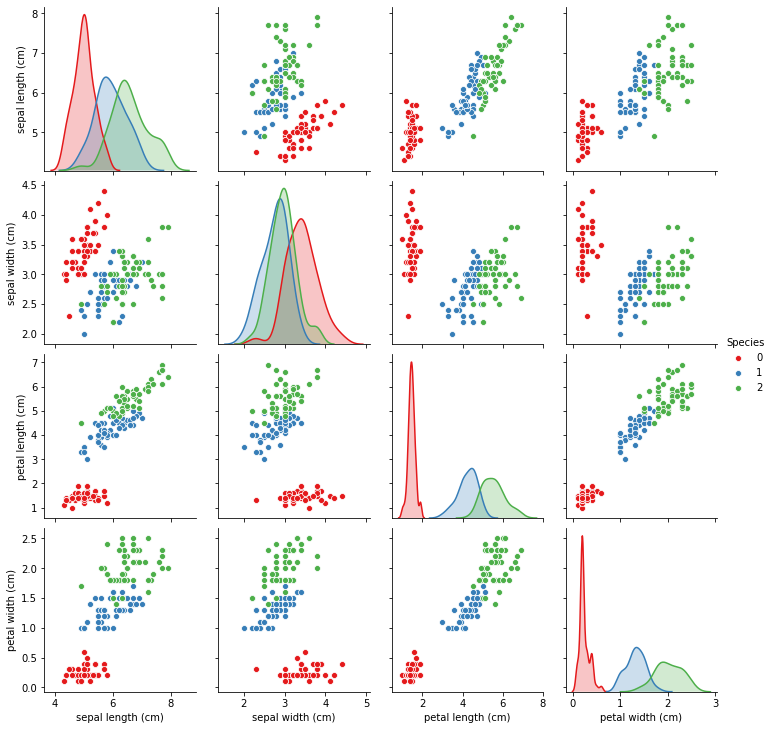

In [16]:
#すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。

sns.set_palette('Set1')
sns.pairplot(data=df, hue="Species")
plt.show()

In [18]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


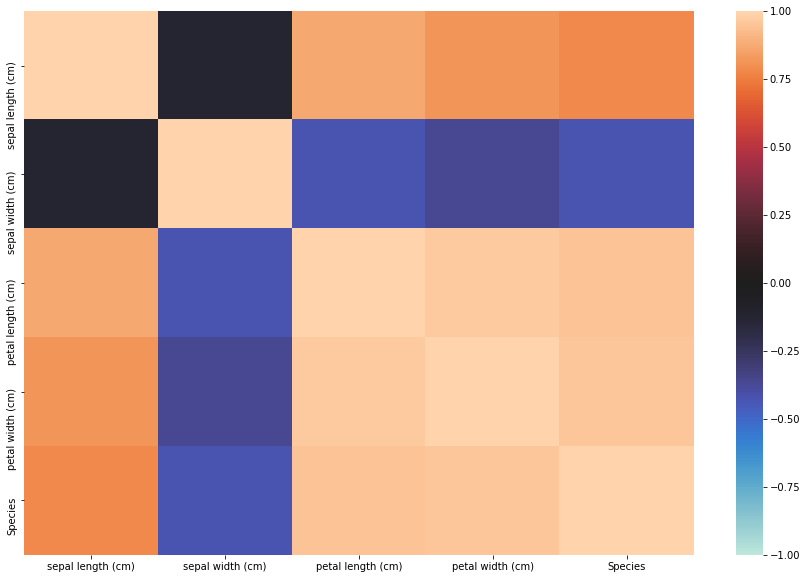

In [28]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.set_palette("deep")
sns.heatmap(corr, vmax=1, vmin=-1, center=0)

In [42]:
"""【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。
ここまでで作成した表や図から読み取れることや気づきを説明してください。
例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。"""

"""
特徴の差が出やすいのは、Petal widthとPetal length

- Iris-Setosa
  PETALが最も小さい。
  Petal width 0～0.5cm  Petal length 0～2cm

- Iris-Versicolour
　PETALが中ぐらいの大きさ。
  Petal width 1～1.5cm  Petal length 3～5cm

- Iris-Virginica
  PETALが最も大きい。
  Petal width 1.5～2.5cm  Petal length 4～8cm

"""             

'\n特徴の差が出やすいのは、Petal widthとPetal length\n\n- Iris-Setosa\n  PETALが最も小さい。\n  Petal width 0～0.5cm  Petal length 0～2cm\n\n- Iris-Versicolour\n\u3000PETALが中ぐらいの大きさ。\n  Petal width 1～1.5cm  Petal length 3～5cm\n\n- Iris-Virginica\n  PETALが最も大きい。\n  Petal width 1.5～2.5cm  Petal length 4～8cm\n\n'